In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline 
import nltk
from io import StringIO
import collections as co
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt


In [17]:
df = pd.read_csv('Replaced.csv',encoding='ISO-8859-1')
df.head()

,ProductId,brand,categories,name,text,title,rating,reviewsdate,didPurchase,doRecommend,...,dateUpdated,ean,keys,manufacturer,manufacturerNumber,dateSeen,reviews_id,sourceURLs,userCity,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Just Awesome,5,11/30/2012,True,True,...,2018-02-05T08:36:58Z,6.03E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,https://redsky.target.com/groot-domain-api/v1/...,Japan,6.03E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Good,5,7/9/2017,True,True,...,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,2017-09-16T09:45:00.000Z,100209113.0,https://www.walmart.com/reviews/product/29775278,Japan,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Good,5,7/9/2017,True,True,...,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,2017-08-23T10:37:00.000Z,100209113.0,https://www.walmart.com/reviews/product/29775278,America,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Disappointed,1,1/6/2016,False,False,...,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",113026909.0,https://www.walmart.com/reviews/product/43383370,China,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Irritation,1,12/21/2016,False,False,...,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",171267657.0,https://www.walmart.com/reviews/product/43383370,China,67981934427


In [18]:
#total number of ratings
print('In all, there are ',df['rating'].nunique(),'types of ratings in the dataset: ',df['rating'].unique())

In all, there are  5 types of ratings in the dataset:  [5 1 3 4 2]


In [19]:
#total number of products
print('In all, there are ',df['name'].nunique(),'products in the dataset: ',df['name'].unique())

In all, there are  600 products in the dataset:  ['Pink Friday: Roman Reloaded Re-Up (w/dvd)'
 'Lundberg Organic Cinnamon Toast Rice Cakes'
 'K-Y Love Sensuality Pleasure Gel' 'J.R. Watkins Hand Cream, Lemon Cream'
 'Ambi Complexion Cleansing Bar'
 "Johnson's Baby Bubble Bath and Wash, 15oz"
 'Olay Regenerist Deep Hydration Regenerating Cream'
 'Windex Original Glass Cleaner Refill 67.6oz (2 Liter)'
 'Heinz Tomato Ketchup, 38oz'
 'Kind Dark Chocolate Chunk Gluten Free Granola Bars - 5 Count'
 'Pantene Color Preserve Volume Shampoo, 25.4oz'
 'Aussie Aussome Volume Shampoo, 13.5 Oz' "Cars Toon: Mater's Tall Tales"
 'CeraVe SA Renewing Cream' 'Solo Foods Almond Paste'
 'Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count'
 'Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler'
 'Pearhead Id Bracelet Frame'
 'Craft Punch Giga Scallop Circle 45 24687534 To 334'
 'Neutrogena Wet Skin Sunscreen Spray Broad Spectrum SPF 50, 5oz'
 "Meguiar's Deep Crystal Car Was

***How rating is distributed***

* kind='pie' :- gives the type of diagram we want to use 

* autopct='%1.5f%%' :- you to display the percent value using Python string formatting. If autopct='%1.5f', then for each pie wedge, the format string is '%1.5f' and the numerical percent value for that wedge is pct, so the wedge label is set to the string '%1.5f'%pct.

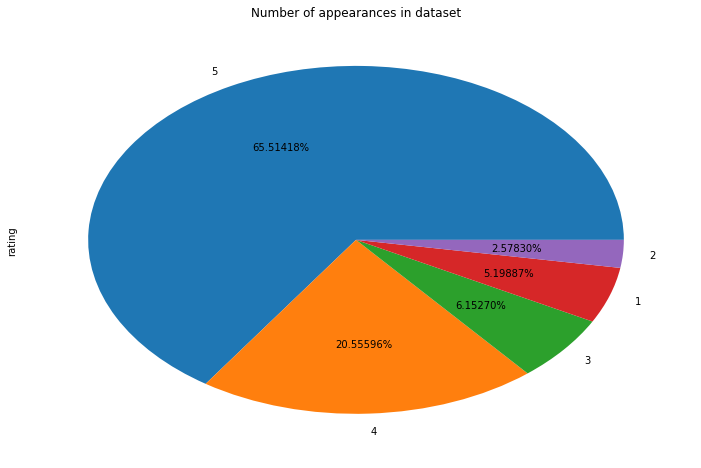

In [20]:
plt.figure(figsize=(12,8))
df.rating.value_counts().plot(kind='pie',autopct='%1.5f%%')
plt.title('Number of appearances in dataset')
plt.show()

**Year-wise Distribution of reviews**

** Converting the datatype of reviewsdate column into only year type **

In [21]:
df['reviewsdate'] = pd.to_datetime(df['reviewsdate'], errors='coerce')

In [22]:
df['reviewsdate']=df.reviewsdate.dt.year
df[:9]

,ProductId,brand,categories,name,text,title,rating,reviewsdate,didPurchase,doRecommend,...,dateUpdated,ean,keys,manufacturer,manufacturerNumber,dateSeen,reviews_id,sourceURLs,userCity,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),i love this album. it's very good. more to the...,Just Awesome,5,2012.0,True,True,...,2018-02-05T08:36:58Z,6.03E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,https://redsky.target.com/groot-domain-api/v1/...,Japan,6.03E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor. This review was collected as part...,Good,5,2017.0,True,True,...,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,2017-09-16T09:45:00.000Z,100209113.0,https://www.walmart.com/reviews/product/29775278,Japan,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,Good flavor.,Good,5,2017.0,True,True,...,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,2017-08-23T10:37:00.000Z,100209113.0,https://www.walmart.com/reviews/product/29775278,America,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,I read through the reviews on here before look...,Disappointed,1,2016.0,False,False,...,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",113026909.0,https://www.walmart.com/reviews/product/43383370,China,67981934427
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,My husband bought this gel for us. The gel cau...,Irritation,1,2016.0,False,False,...,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",171267657.0,https://www.walmart.com/reviews/product/43383370,China,67981934427
5,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,My boyfriend and I bought this to spice things...,Not worth it,1,2016.0,False,False,...,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",149773828.0,https://www.walmart.com/reviews/product/43383370,Australia,67981934427
6,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,Bought this earlier today and was excited to c...,Disappointing,1,2016.0,False,False,...,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",129088591.0,https://www.walmart.com/reviews/product/43383370,Japan,67981934427
7,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,I bought this product for my husband and I to ...,Not happy at all,1,2016.0,False,False,...,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",131769441.0,https://www.walmart.com/reviews/product/43383370,UK,67981934427
8,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,My husband and I bought this for some extra fu...,Very disappointing,1,2016.0,False,False,...,2018-02-05T11:25:51Z,67981934427,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",K-Y,67981934427,"2017-09-04T12:18:00.000Z,2017-08-09T02:12:00.000Z",148314686.0,https://www.walmart.com/review

In [23]:
print('The Ratings along with their occurence in every year:')
df.groupby((['reviewsdate','rating'])).size()

The Ratings along with their occurence in every year:


reviewsdate  rating
2006.0       5             1
2007.0       3             1
             5            20
2008.0       1             4
             2             5
             3             9
             4            16
             5            51
2009.0       1            27
             2            20
             3            38
             4           139
             5           536
2010.0       1            84
             2            28
             3            42
             4           150
             5           686
2011.0       1            94
             2            42
             3            49
             4           184
             5           614
2012.0       1           310
             2           151
             3           192
             4           948
             5          5255
2013.0       1           387
             2           171
             3           172
             4           506
             5          1736
2014.0       1         

** Creating a bar plot of the total number of products sold in a particular year **

We define the size of the figure with the function figsize and provide the title, xlabel and ylabel to represent the information

The Year-wise distribution of products


Text(0,0.5,'Count of products')

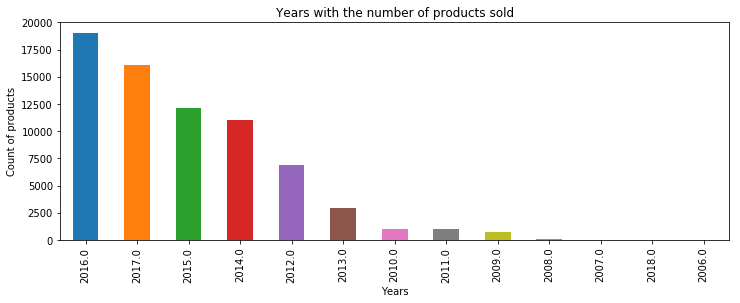

In [26]:
print("The Year-wise distribution of products")
year_no_of_product=df["reviewsdate"].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12,4))
year_no_of_product.plot(title='Years with the number of products sold',kind="bar")
plt.xlabel('Years')
plt.ylabel('Count of products')

***Review Level***

In [13]:
df1=df[df['title'].notnull()]

** Removing the rows with no column, i.e empty rows with the use of lambda expression **

**StringIO can be used where a file was expected. It serves morelike a buffer and can store data when other files are missing**

In [14]:
string=StringIO()
df1['title'].apply(lambda x: string.write(x))
x=string.getvalue()
string.close()
x=x.lower()
x=x.split()

 ***We use nltk for symbolic and statistical natural language processing (NLP) for English written in the Python programming language***

In [15]:
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\RIO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

*** co.Counter(nltk.corpus.words.words())
importing the words and checking the occurence of it ***

In [16]:
words = co.Counter(nltk.corpus.words.words())
stopWords =co.Counter( nltk.corpus.stopwords.words() )
x=[i for i in x if i in words and i not in stopWords]
string=" ".join(x)
c = co.Counter(x)

*** using the function to call out the top 10 common words used ***

In [17]:
most_common_10=c.most_common(10)
print('The 10 Most Common Words in reviews are: ')
most_common_10

The 10 Most Common Words in reviews are: 


[('movie', 1541),
 ('love', 1416),
 ('product', 1336),
 ('great', 1308),
 ('good', 1271),
 ('family', 898),
 ('best', 544),
 ('total', 532),
 ('like', 513),
 ('new', 419)]

**Popular Products**

*** WordCloud is created based on the words which are frequently used and popular and appears in big font compared to other words.
We give the attributes such as background_color of the cloud , its width, its height and scaling as per the column name mentioned in the code ***

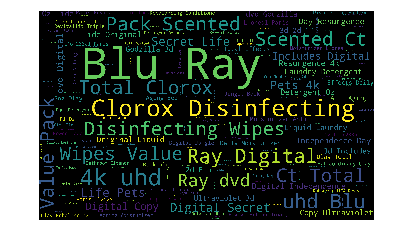

In [18]:
wordcloud1 = WordCloud(
                          background_color='black',
                          width=8000,
                          height=5000,
                          relative_scaling = 1.0
                         ).generate(" ".join(df['name']))
plt.imshow(wordcloud1)
plt.axis('off')
plt.show()

## The content of this project itself is licensed under the and the underlying source code used to format and display that content is licensed under the [MIT LICENSE](https://github.com/Jinansi/PythonProjects/blob/master/LICENSE)